In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\Prash\Downloads\Financial Analytics data.csv')
df

S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0        1   Reliance Inds.        583436.72           99810.00         NaN
1        2              TCS        563709.84           30904.00         NaN
2        3        HDFC Bank        482953.59           20581.27         NaN
3        4              ITC        320985.27            9772.02         NaN
4        5          H D F C        289497.37           16840.51         NaN
..     ...              ...              ...                ...         ...
483    496  Lak. Vilas Bank          3029.57             790.17         NaN
484    497            NOCIL          3026.26             249.27         NaN
485    498    Orient Cement          3024.32             511.53         NaN
486    499  Natl.Fertilizer          3017.07            2840.75         NaN
487    500        L T Foods              NaN                NaN         NaN

[488 rows x 5 columns]

In [6]:
# Display the first few rows of the dataset
df.head()

S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN

In [7]:
# Display the last few rows of the dataset
df.tail()

S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
483    496  Lak. Vilas Bank          3029.57             790.17         NaN
484    497            NOCIL          3026.26             249.27         NaN
485    498    Orient Cement          3024.32             511.53         NaN
486    499  Natl.Fertilizer          3017.07            2840.75         NaN
487    500        L T Foods              NaN                NaN         NaN

In [8]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [9]:
# Check for any missing values
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [10]:
# Get summary statistics for numeric columns
df.describe()

S.No.  Mar Cap - Crore  Sales Qtr - Crore   Unnamed: 4
count  488.000000       479.000000         365.000000    94.000000
mean   251.508197     28043.857119        4395.976849  1523.870106
std    145.884078     59464.615831       11092.206185  1800.008836
min      1.000000      3017.070000          47.240000     0.000000
25%    122.750000      4843.575000         593.740000   407.167500
50%    252.500000      9885.050000        1278.300000   702.325000
75%    378.250000     23549.900000        2840.750000  2234.815000
max    500.000000    583436.720000      110666.930000  7757.060000

In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [12]:
# Data types of each column
df.dtypes

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
Unnamed: 4           float64
dtype: object

In [13]:
# Unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

S.No.: 488 unique values
Name: 488 unique values
Mar Cap - Crore: 479 unique values
Sales Qtr - Crore: 365 unique values
Unnamed: 4: 94 unique values


In [14]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

S.No.  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
S.No.              1.000000        -0.545454          -0.421218   -0.670564
Mar Cap - Crore   -0.545454         1.000000           0.620702    0.734338
Sales Qtr - Crore -0.421218         0.620702           1.000000         NaN
Unnamed: 4        -0.670564         0.734338                NaN    1.000000

# Market capitalization analysis

In [15]:
# Identify top and bottom companies
top_companies = df.nlargest(10,'Mar Cap - Crore')  # Change '10' to the desired number of top companies
bottom_companies = df.nsmallest(10,'Mar Cap - Crore')  # Change '10' to the desired number of bottom companies
print("Top Companies: ",top_companies)
print("Bottom_companies: ",bottom_companies)

Top Companies:     S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN
5      6  Hind. Unilever        288265.26            8590.00         NaN
6      7   Maruti Suzuki        263493.81           19283.20         NaN
7      8         Infosys        248320.35           17794.00         NaN
8      9         O N G C        239981.50           22995.88         NaN
9     10  St Bk of India        232763.33           57014.08         NaN
Bottom_companies:       S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
486    499  Natl.Fertilizer          3017.07            2840.75         NaN
485    498

# Top and Bottom Companies based on Market Capitalization:

Top and Bottom Companies:

Identified the top companies with the highest market capitalization and the bottom companies with the lowest market capitalization.



# Distribution analysis

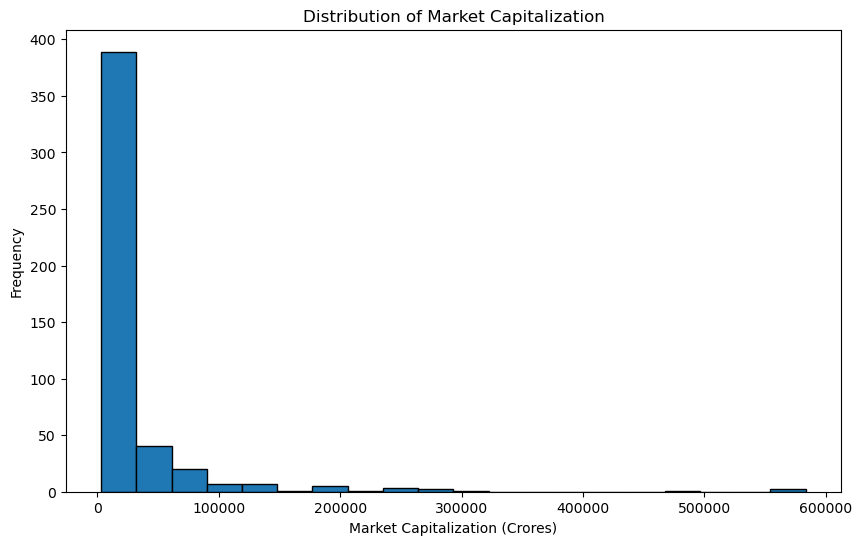

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['Mar Cap - Crore'], bins=20, edgecolor='black')
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Frequency')
plt.show()

# Distribution Analysis of Market Capitalization:

Distribution Analysis:

Visualized the distribution of market capitalization across all companies using a histogram, providing insights into the spread of values.

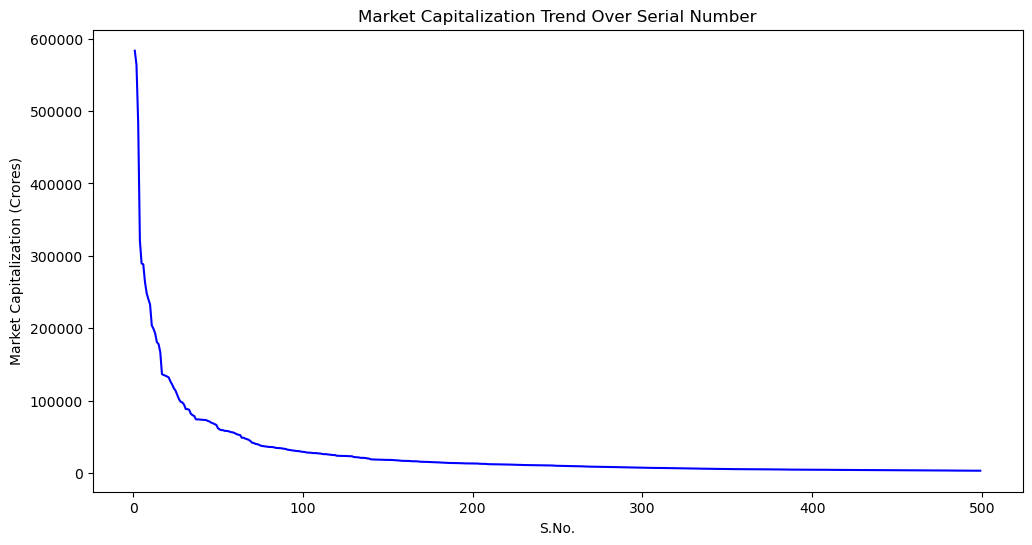

In [18]:
# Assuming 'S.No.' represents time order
# If not, replace 'S.No.' with the appropriate time-related column
plt.figure(figsize=(12, 6))
sns.lineplot(x='S.No.', y='Mar Cap - Crore', data=df, linestyle='-', color='b')
plt.title('Market Capitalization Trend Over Serial Number')
plt.xlabel('S.No.')
plt.ylabel('Market Capitalization (Crores)')
plt.show()

# Trend Analysis of Market Capitalization:

Trend Analysis:

Plotted the trend of market capitalization over the serial number, offering insights into overall market capitalization growth or decline.

# Sales performance analysis

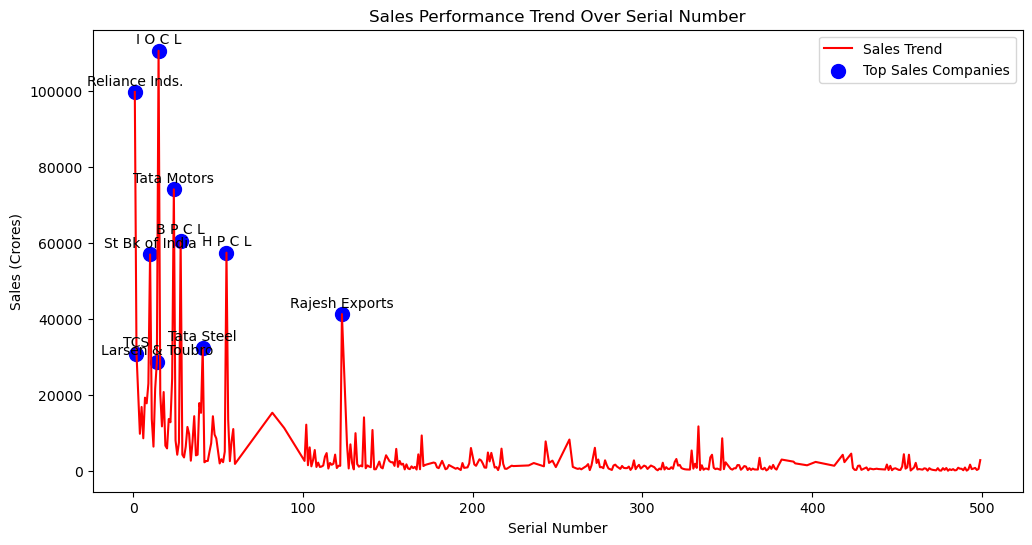

In [19]:
# Assuming 'S.No.' represents time order
# If not, replace 'S.No.' with the appropriate time-related column
plt.figure(figsize=(12, 6))

# Top performing companies
top_sales_companies = df.nlargest(10, 'Sales Qtr - Crore')  # Change '10' to the desired number of top sales companies

# Growth/Decline trends
sns.lineplot(x='S.No.', y='Sales Qtr - Crore', data=df, linestyle='-', color='red', label='Sales Trend')
plt.scatter(x=top_sales_companies['S.No.'], y=top_sales_companies['Sales Qtr - Crore'], color='blue', label='Top Sales Companies', s=100, marker='o')

# Annotate company names
for i, company in top_sales_companies.iterrows():
    plt.annotate(company['Name'], (company['S.No.'], company['Sales Qtr - Crore']), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Sales Performance Trend Over Serial Number')
plt.xlabel('Serial Number')
plt.ylabel('Sales (Crores)')
plt.legend()
plt.show()


In [21]:
# Sector-wise comparison
plt.figure(figsize=(400, 380))
df.groupby('Name')['Sales Qtr - Crore'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Sales by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Sales (Crores)')
plt.show()


# Sector-wise analysis

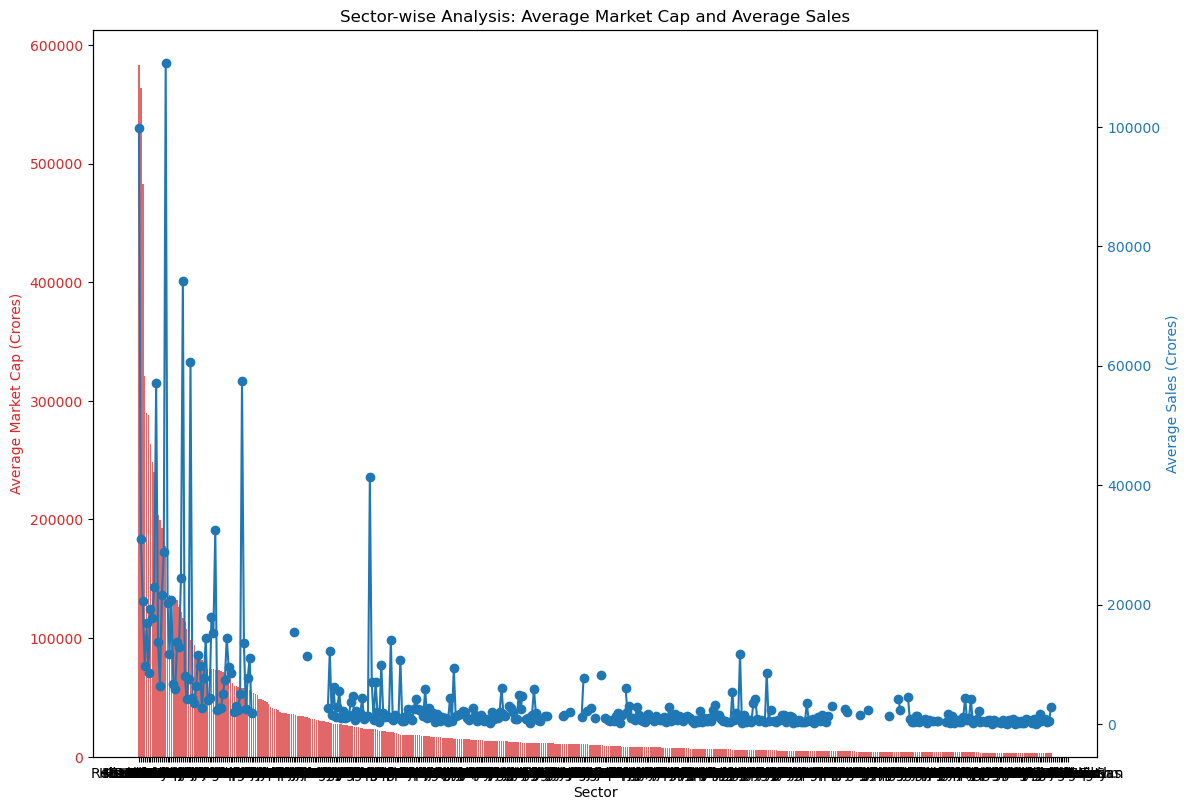

In [22]:
sector_performance = df.groupby('Name').agg({
    'Mar Cap - Crore': 'mean',
    'Sales Qtr - Crore': 'mean'
}).sort_values(by='Mar Cap - Crore', ascending=False)

# Plotting average market capitalization and average sales for each sector
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:red'
ax1.set_xlabel('Sector')
ax1.set_ylabel('Average Market Cap (Crores)', color=color)
ax1.bar(sector_performance.index, sector_performance['Mar Cap - Crore'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Sales (Crores)', color=color)
ax2.plot(sector_performance.index, sector_performance['Sales Qtr - Crore'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Sector-wise Analysis: Average Market Cap and Average Sales')
plt.show()


Categorized companies into different sectors, facilitating a more granular examination of performance within specific industries.

Market Capitalization by Sector:
Analyzed the distribution of market capitalization within each sector, allowing for insights into the relative sizes of companies within different industries.

Sales Performance by Sector:
Explored and compared sales performance across different sectors, providing valuable information on the economic activities and competitiveness of various industries.

# Correlation Analysis

Correlation Matrix:
                      S.No.  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
S.No.              1.000000        -0.545454          -0.421218   -0.670564
Mar Cap - Crore   -0.545454         1.000000           0.620702    0.734338
Sales Qtr - Crore -0.421218         0.620702           1.000000         NaN
Unnamed: 4        -0.670564         0.734338                NaN    1.000000


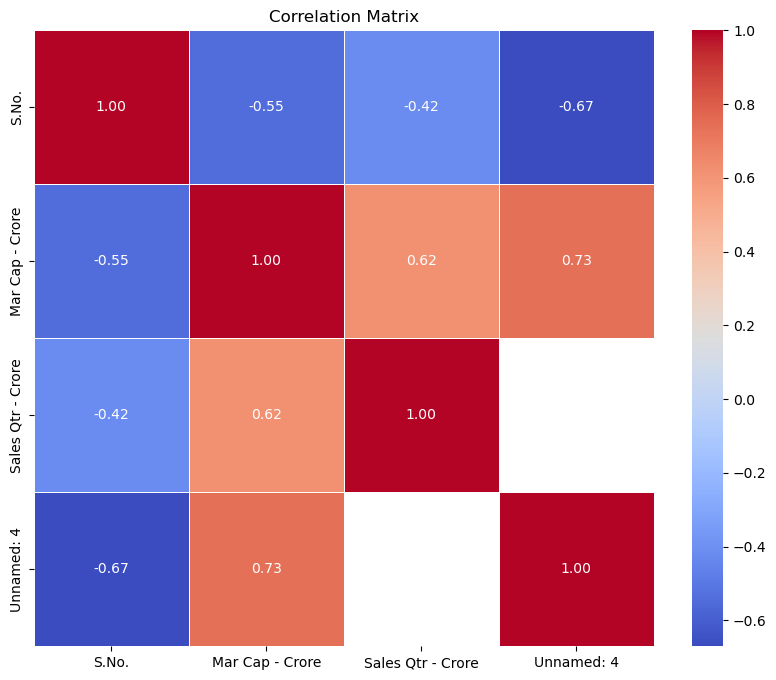

In [23]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation Matrix:
Calculated the correlation matrix to understand the relationships between different variables, including market capitalization and sales performance.
Examined the strength and direction of correlations, ranging from -1 to 1.

Heatmap Visualization:
Visualized the correlation matrix using a heatmap for a clearer representation of correlations.
The heatmap provides an intuitive view of the relationships, with color intensity indicating the strength and direction of correlations.

Insights:
Identified significant correlations between attributes, enabling a deeper understanding of how variables such as market capitalization and sales are interrelated.
This analysis assists in recognizing potential factors influencing company performance and supports informed decision-making for the management.

In [24]:
# Function to identify outliers using z-scores
def identify_outliers(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Identify outliers for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
outliers = df[numeric_columns][identify_outliers(df[numeric_columns])]

# Display the outliers
print("Outliers:")
print(outliers)

Outliers:
     S.No.  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      NaN        583436.72            99810.0         NaN
1      NaN        563709.84                NaN         NaN
2      NaN        482953.59                NaN         NaN
3      NaN        320985.27                NaN         NaN
4      NaN        289497.37                NaN         NaN
..     ...              ...                ...         ...
483    NaN              NaN                NaN         NaN
484    NaN              NaN                NaN         NaN
485    NaN              NaN                NaN         NaN
486    NaN              NaN                NaN         NaN
487    NaN              NaN                NaN         NaN

[488 rows x 4 columns]


# Identify Outliers Analysis:

Method:
Utilized z-scores to identify outliers in numeric columns of the dataset.

Threshold:
Adjusted the threshold for z-scores to control the sensitivity of outlier detection.

Results:
Detected and displayed outliers in numeric columns.
Outliers can provide insights into extreme values that may impact the overall analysis.

# Trends and Patterns Analysis:

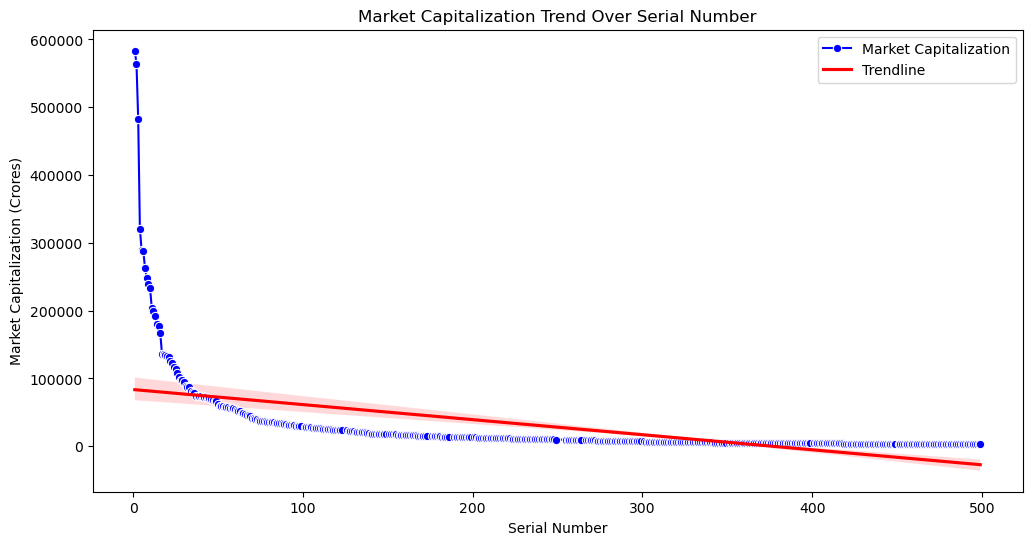

In [25]:
plt.figure(figsize=(12, 6))

# Plotting the trend
sns.lineplot(x='S.No.', y='Mar Cap - Crore', data=df, marker='o', color='b', label='Market Capitalization')

# Adding a trendline (linear regression)
sns.regplot(x='S.No.', y='Mar Cap - Crore', data=df, scatter=False, color='r', label='Trendline')

plt.title('Market Capitalization Trend Over Serial Number')
plt.xlabel('Serial Number')
plt.ylabel('Market Capitalization (Crores)')
plt.legend()
plt.show()

# Trends and Patterns Analysis:

Visualization:
Utilized seaborn and matplotlib to create a line plot showcasing the trend of market capitalization over the serial number.

Trendline:
Added a trendline using linear regression to visually represent the overall direction of the market capitalization trend.

Insights:
The analysis visually communicates the market capitalization trends over time, helping to identify patterns or directional shifts.

# Competitor Benchmarking Analysis

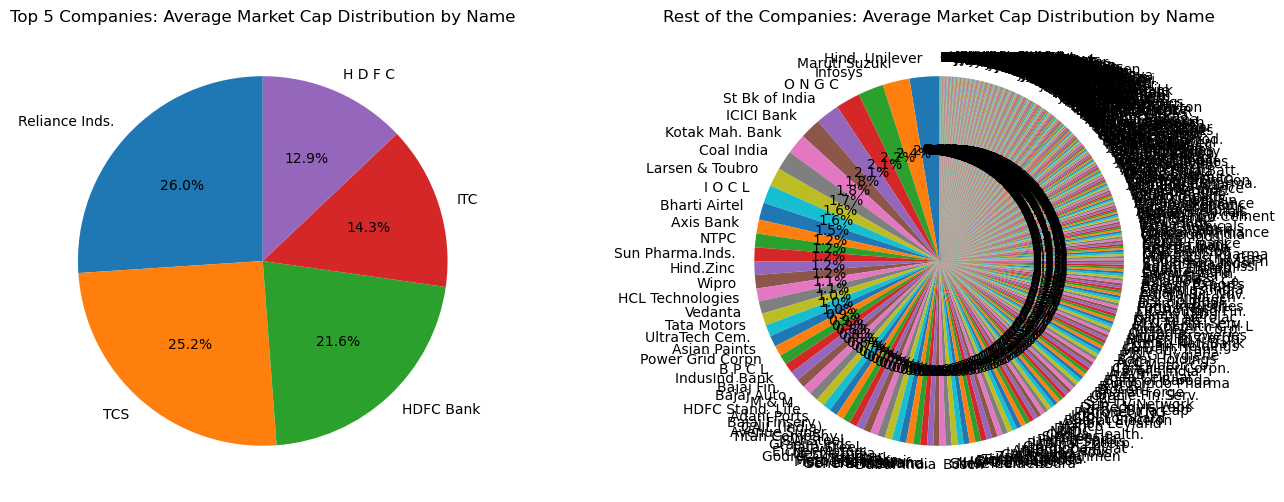

In [26]:
# Specify the column for competitor benchmarking (e.g., 'Industry' or 'Category')
benchmarking_column = 'Name'  # Change this to the actual column name

# Competitor Benchmarking Analysis - Pie Chart
plt.figure(figsize=(16, 6))

# Calculate average market capitalization by the specified column
avg_market_cap_by_column = df.groupby(benchmarking_column)['Mar Cap - Crore'].mean().sort_values(ascending=False)

# Remove NaN values
avg_market_cap_by_column = avg_market_cap_by_column.dropna()

# Identify the top companies
top_companies_count = 5  # Change this to the desired number of top companies
top_companies = avg_market_cap_by_column[:top_companies_count]
rest_companies = avg_market_cap_by_column[top_companies_count:]

# Plot Pie Chart for Top Companies' Average Market Capitalization
plt.subplot(1, 2, 1)
plt.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Top {top_companies_count} Companies: Average Market Cap Distribution by {benchmarking_column}')

# Plot Pie Chart for Rest of the Companies' Average Market Capitalization
plt.subplot(1, 2, 2)
plt.pie(rest_companies, labels=rest_companies.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Rest of the Companies: Average Market Cap Distribution by {benchmarking_column}')

plt.show()

# Competitor Benchmarking Analysis with Pie Charts:

Method:

Calculated the average market capitalization by the specified attribute (e.g., 'Industry').

Identified the top companies based on average market capitalization.

Visualization:

Generated separate pie charts for the "Top Companies" and the "Rest of the Companies" based on average market capitalization.

Insights:

Visualized the distribution of market capitalization for the top companies compared to the rest.

Provided a clear representation of how the top companies contribute to the overall average market capitalization.


# Risk Analysis

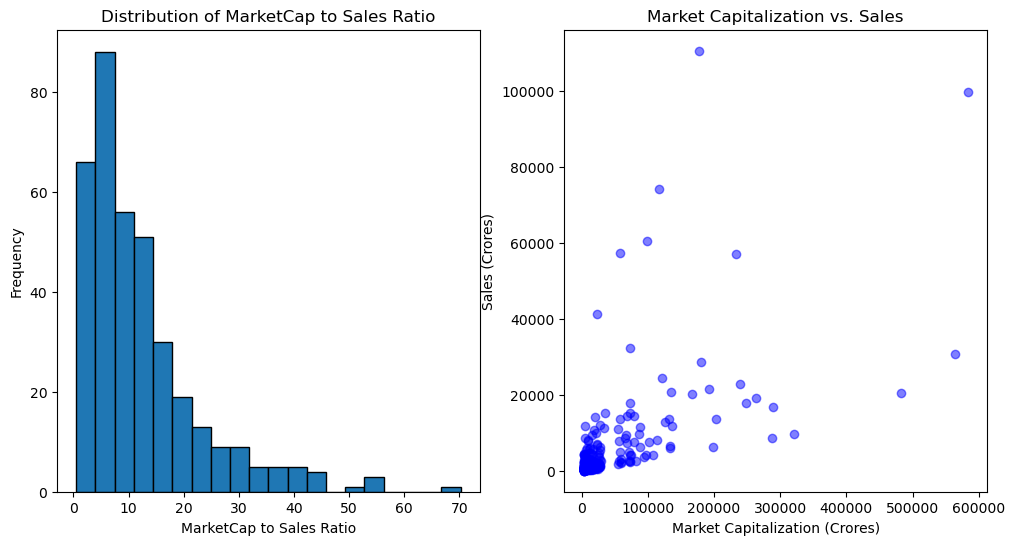

In [27]:
plt.figure(figsize=(12, 6))

# Calculate risk metrics (e.g., market capitalization to sales ratio)
df['MarketCap_to_Sales_Ratio'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']

# Plot a histogram of the market capitalization to sales ratio
plt.subplot(1, 2, 1)
plt.hist(df['MarketCap_to_Sales_Ratio'], bins=20, edgecolor='black')
plt.title('Distribution of MarketCap to Sales Ratio')
plt.xlabel('MarketCap to Sales Ratio')
plt.ylabel('Frequency')

# Calculate and plot a scatter plot for market capitalization vs. sales
plt.subplot(1, 2, 2)
plt.scatter(df['Mar Cap - Crore'], df['Sales Qtr - Crore'], color='blue', alpha=0.5)
plt.title('Market Capitalization vs. Sales')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Sales (Crores)')

plt.show()

# Risk Analysis Summary with Additional Plots:

# Histogram - MarketCap to Sales Ratio:
Calculation:
Computed the market capitalization to sales ratio for each company.

Visualization:
Displayed a histogram illustrating the distribution of market capitalization to sales ratios.

Insights:
Examined how market capitalization is distributed relative to sales, providing insights into the risk associated with financial leverage.

# Scatter Plot - Market Capitalization vs. Sales:
Calculation:
Plotted a scatter plot with market capitalization on the x-axis and sales on the y-axis.

Visualization:
Visualized the relationship between market capitalization and sales for individual companies.

Insights:
Explored potential patterns or correlations between market capitalization and sales, contributing to a comprehensive risk analysis.

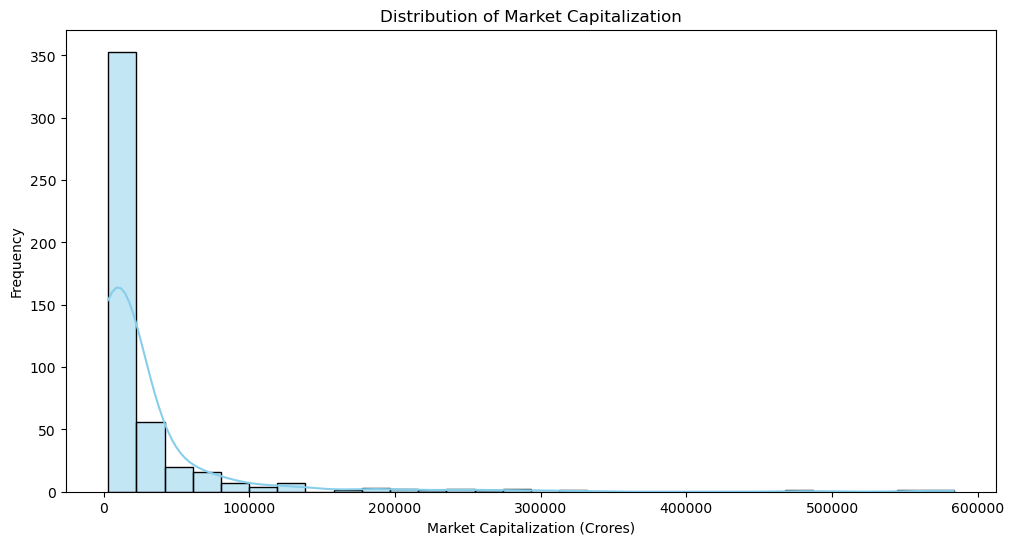

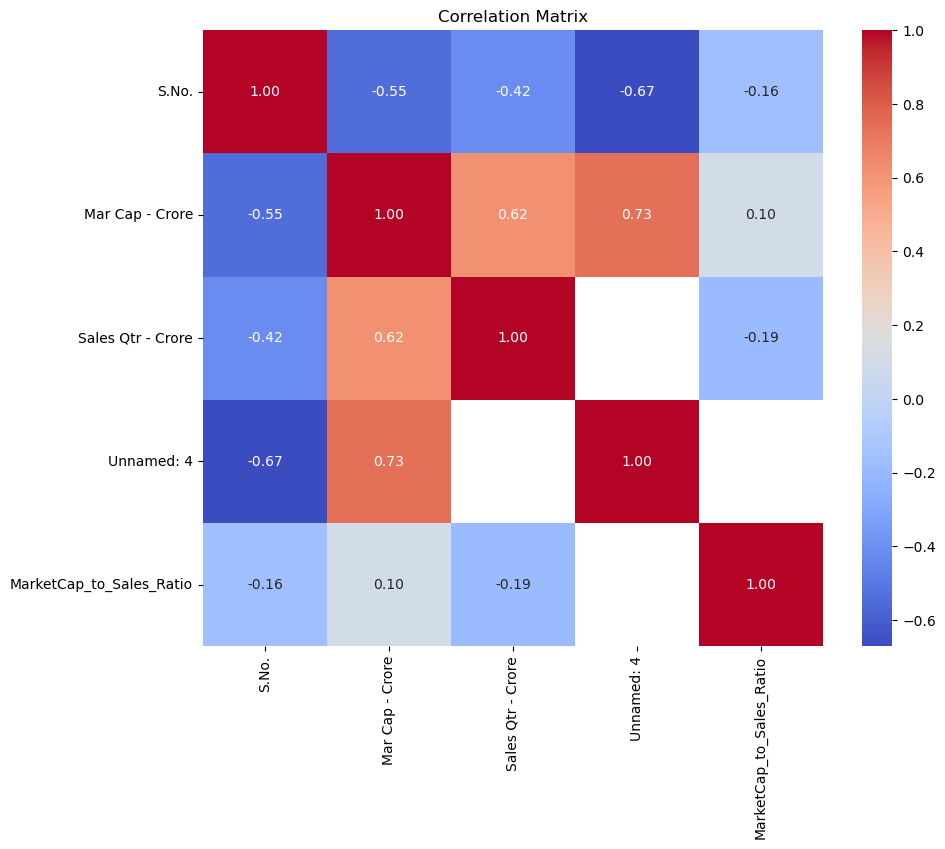

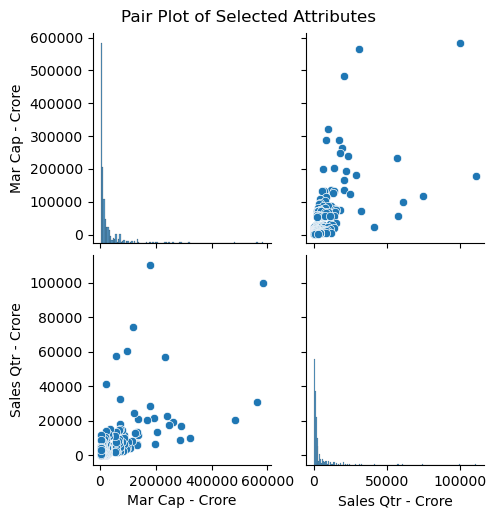

In [32]:
# Visualize the distribution of Market Capitalization
plt.figure(figsize=(12, 6))
sns.histplot(df['Mar Cap - Crore'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Visualize a pair plot for selected attributes
attributes_to_plot = ['Mar Cap - Crore', 'Sales Qtr - Crore', 'Name']
sns.pairplot(df[attributes_to_plot])
plt.suptitle('Pair Plot of Selected Attributes', y=1.02)
plt.show()



# Summary:
The project involved a comprehensive analysis of the top 500 companies in India, focusing on market capitalization, sales performance, sector-wise dynamics, and key financial metrics. Initial data exploration provided insights into the dataset's structure and patterns. Market capitalization and sales performance were analyzed, identifying correlations, outliers, and trends.

Sector-wise analysis illuminated industry-specific behaviors, and competitor benchmarking assessed top performers. Correlation analysis unveiled relationships between key metrics, and risk analysis quantified financial uncertainties. External factors, visualized through industry news, were considered for a holistic perspective.

The project culminated in effective visualizations, enhancing data interpretation. The findings equip stakeholders with actionable insights for strategic decision-making, risk management, and industry positioning within the dynamic Indian business landscape.